<a href="https://colab.research.google.com/github/imranaljahsyi/REPOSITORY-1/blob/main/IBMDataScienceProfessional_Machine_Learning_with_Python_FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Welcome to my assignment submission. My name is Imran* 

*I apologise for not completing this assignment via IBM Watson Studio, as requested on the module for this assignment. The reason for this is that my free month has ended and I won't be able to access it until January. I have alternatively decided to use GoogleColab for this project as it has a unit testing interface which is able to run .ipynb files similar to JupyterLab on IBM Watson Studio.*




# **Instructions**

Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:



1.  k-Nearest Neighbour
2.  Decision Tree
3. Support Vector Machine (SVM)
4. Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

*   Jaccard index
*   F1-score
*   LogLoass









### 1. Import Libraries & Download Dataset

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [11]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

print ("Dataset Downloaded")

--2020-12-18 14:09:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2020-12-18 14:09:47 (229 MB/s) - ‘loan_train.csv’ saved [23101/23101]

Dataset Downloaded


### Load Data From CSV File

In [12]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [13]:
df.shape

(346, 10)

### Convert to date time object


In [14]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


In [15]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### Import Seaborn ###

 *The method to install seaborn into Google Collab may differ with that of IBM Watson Studio*

In [27]:
# same
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
# update 1
!conda install -q -y --prefix /usr/local python=3.6 ujson
# update 2
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
# test it
import ujson
print(ujson.dumps({1:2}))

--2020-12-18 14:46:24--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   177MB/s    in 0.3s    

2020-12-18 14:46:24 (177 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6

In [28]:
!conda install -c anaconda seaborn -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base c

In [29]:
import seaborn as sns

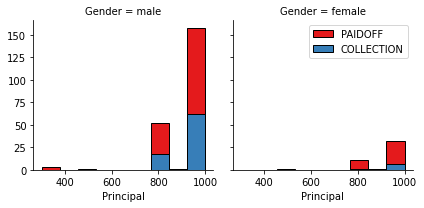

In [30]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

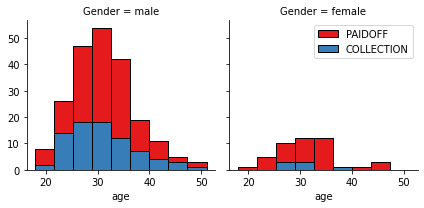

In [31]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

Day of the week people get the loan:

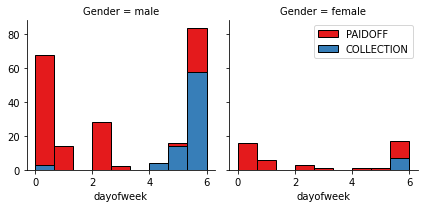

In [32]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [33]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## **Convert Categorical features to numerical values** 


Gender:


In [34]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan.

Convert male to 0 and female to 1:



In [35]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

#### Education

In [36]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding


In [37]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [38]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


#  **Feature Selection** 




definde feature sets, X:

In [39]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [40]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#  Normalize Data


In [41]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Classification

Model Algorithms

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

In [217]:
from scipy.stats import randint
from numpy import array
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, jaccard_score, f1_score, log_loss
from sklearn.metrics import accuracy_score

In [226]:
trainScores={}

# **1. k-Nearest Neighbors (KNN)**

In [161]:
for k in range(1, 10):
    clf_knn  = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    knn_yhat = clf_knn.predict(X_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))

For K = 1 accuracy = 0.7115384615384616
For K = 2 accuracy = 0.625
For K = 3 accuracy = 0.7211538461538461
For K = 4 accuracy = 0.7211538461538461
For K = 5 accuracy = 0.7307692307692307
For K = 6 accuracy = 0.7115384615384616
For K = 7 accuracy = 0.7211538461538461
For K = 8 accuracy = 0.7211538461538461
For K = 9 accuracy = 0.75


Seeing as how K with the accuracy of 9 is highest, lets build a model with k = 9

In [209]:
best_clf_knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
best_clf_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [210]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71153846, 0.625     , 0.72115385, 0.72115385, 0.73076923,
       0.71153846, 0.72115385, 0.72115385, 0.75      ])

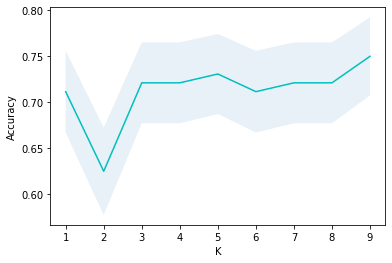

In [211]:
plt.plot(range(1,Ks),mean_acc,'c')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [228]:
trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN-f1-score': 0.9200945404457801, 'KNN-jaccard': 0.9173553719008265}

# **2. Decision Trees**

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.7403846153846154 
For depth = 2  the accuracy score is 0.7403846153846154 
For depth = 3  the accuracy score is 0.7403846153846154 
For depth = 4  the accuracy score is 0.7403846153846154 
For depth = 5  the accuracy score is 0.7403846153846154 
For depth = 6  the accuracy score is 0.7403846153846154 
For depth = 7  the accuracy score is 0.75 
For depth = 8  the accuracy score is 0.7115384615384616 
For depth = 9  the accuracy score is 0.7019230769230769 


In [189]:
bestScore=0.0
accList=[]

# using 10 fold cross validation for scoring the classifier's accuracy
scores = cross_val_score(dt, X, y, cv=10)
score=scores.mean()
accList.append(score)
    
if score > bestScore:
  bestScore=score
  best_clf=dt
  bestD=d

In [190]:
print("Best D is :",bestD,"| Cross validation Accuracy :",bestScore)
dt=best_clf

Best D is : 9 | Cross validation Accuracy : 0.6577310924369748


In [191]:
best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9).fit(X_train, y_train)
best_dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

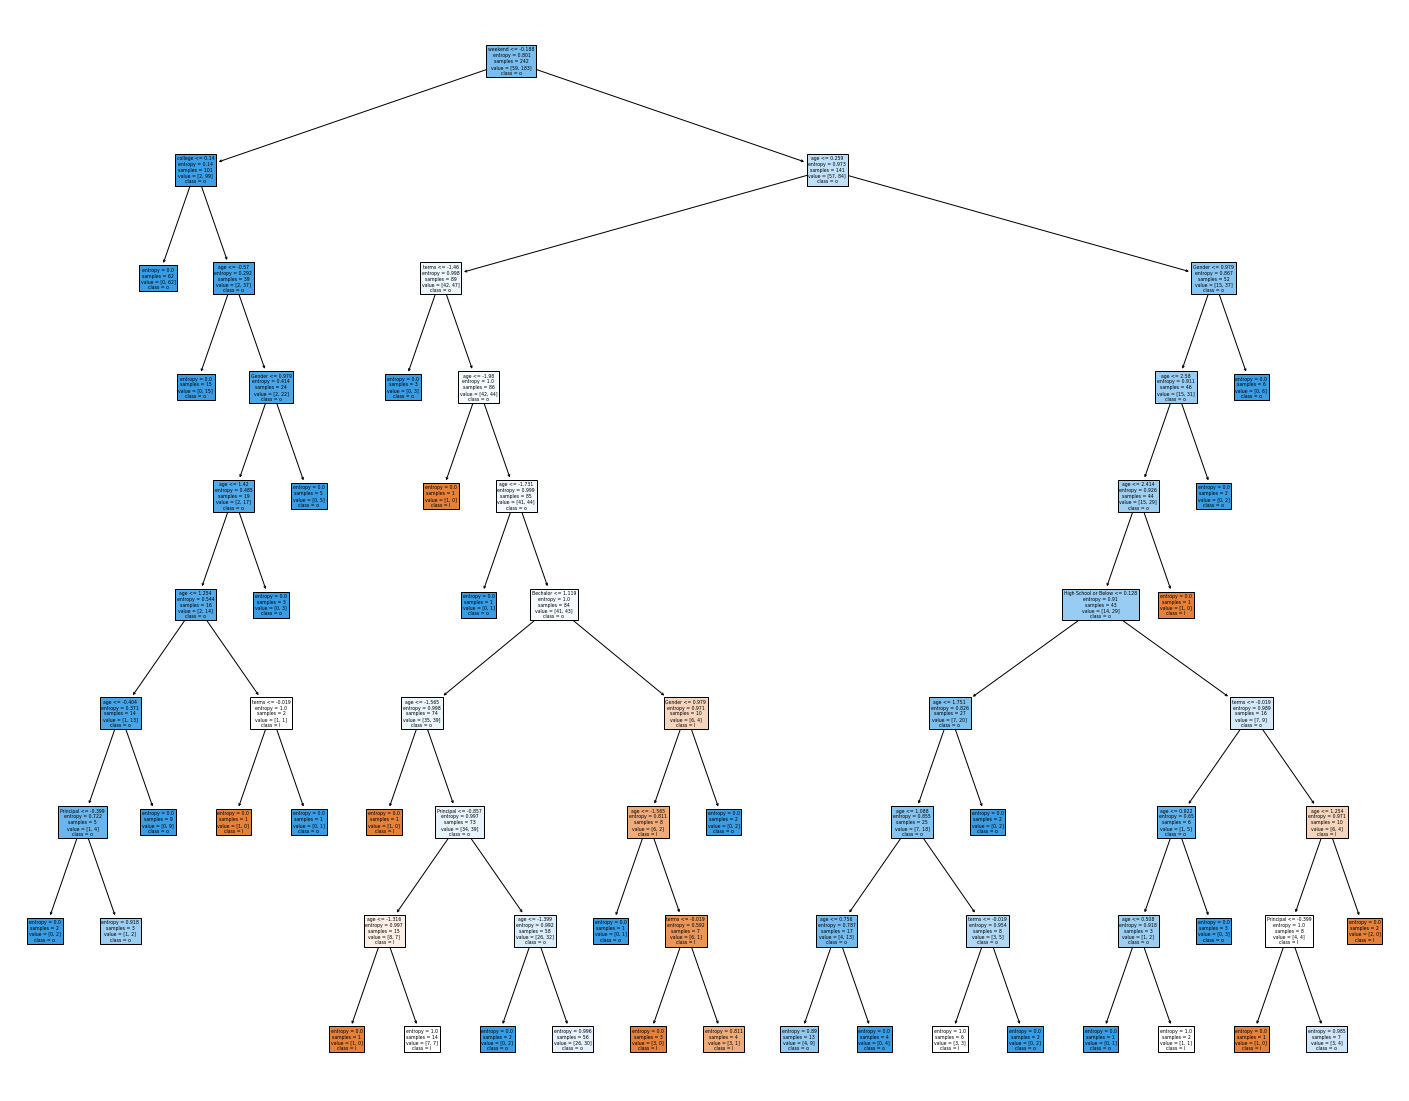

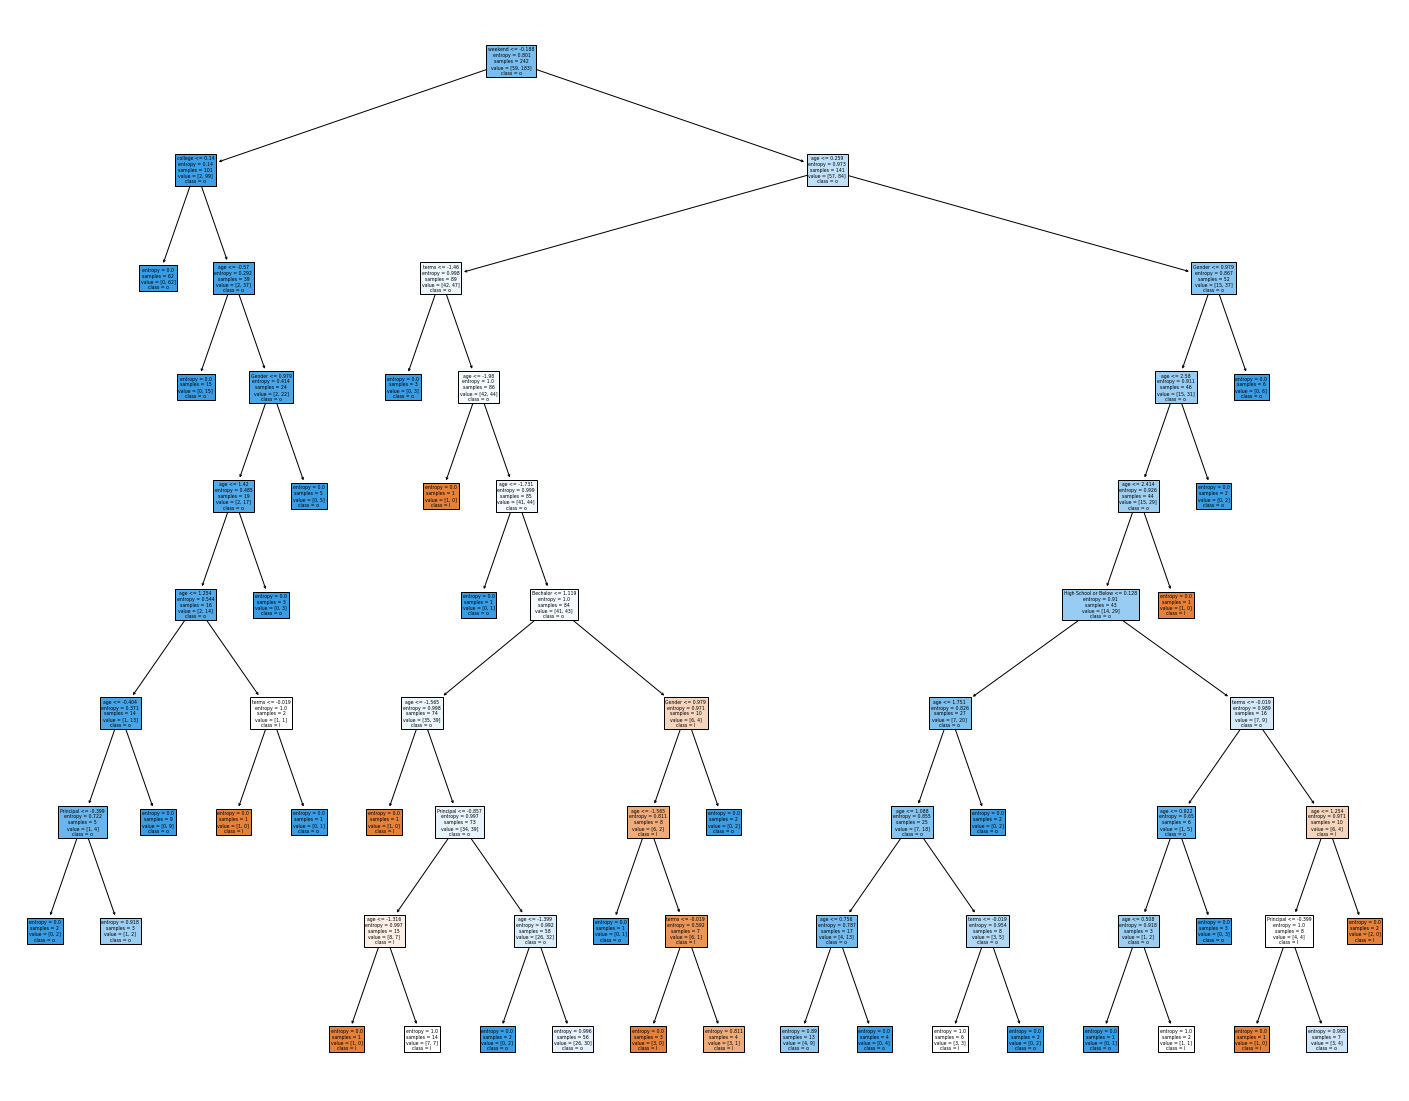

In [192]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                    'dayofweek',
                                     #'deadline'
#                                     ,'Month'
                                   ],  
                   class_names='loan_status',
                   filled=True)
fig

In [195]:
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    dt = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=loant.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74038462, 0.74038462, 0.74038462, 0.74038462, 0.74038462,
       0.74038462, 0.74038462, 0.74038462, 0.74038462])

In [229]:
trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN-f1-score': 0.9200945404457801,
 'KNN-jaccard': 0.9173553719008265,
 'Tree-f1-score': 0.9200945404457801,
 'Tree-jaccard': 0.9173553719008265}

# **3. Support Vector Machines (SVM)**

In [266]:
from sklearn import svm 
from sklearn.metrics import f1_score

In [269]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6299405014874628
For kernel: poly, the f1 score is: 0.6668539325842696
For kernel: rbf, the f1 score is: 0.651984126984127
For kernel: sigmoid, the f1 score is: 0.615600691443388


We can see that the polynomial kernel is highest, with a score of (66%), hence we shall run a SVM Classifier with a Polynomial Kernel :)

In [270]:
best_svm = svm.SVC(kernel='poly').fit(X_train,y_train)
best_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [271]:
trainScores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')

trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN-f1-score': 0.9200945404457801,
 'KNN-jaccard': 0.9173553719008265,
 'LogReg-f1-score': 0.9200945404457801,
 'LogReg-jaccard': 0.9173553719008265,
 'SVM-f1-score': 0.9200945404457801,
 'SVM-jaccard': 0.9173553719008265,
 'Tree-f1-score': 0.9200945404457801,
 'Tree-jaccard': 0.9173553719008265}

# **4. Logistic Regression**

In [145]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [148]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    clf_lr = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = clf_lr.predict(X_test)
    y_prob = clf_lr.predict_proba(X_test)
    print('if the solver is {}, then the logloss becomes : {}'.format(k, log_loss(y_test, y_prob)))

if the solver is lbfgs, then the logloss becomes : 0.5225896323637266
if the solver is saga, then the logloss becomes : 0.5225893602853563
if the solver is liblinear, then the logloss becomes : 0.5762236891512358
if the solver is newton-cg, then the logloss becomes : 0.5225889746839594
if the solver is sag, then the logloss becomes : 0.5225936516690537


We can see that the 'liblinear' model returned the highest logloss value (57%), hence we shall build with this model.


In [149]:
best_clf_lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
best_clf_lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
trainScores['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN-f1-score': 0.9200945404457801,
 'KNN-jaccard': 0.9173553719008265,
 'LogReg-f1-score': 0.9200945404457801,
 'LogReg-jaccard': 0.9173553719008265,
 'SVM-f1-score': 0.9200945404457801,
 'SVM-jaccard': 0.9173553719008265,
 'Tree-f1-score': 0.9200945404457801,
 'Tree-jaccard': 0.9173553719008265}

# **Model Evaluation using Test set**

In [243]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-18 20:34:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-18 20:34:02 (751 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [244]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [245]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [247]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

K-Nearest Neighbours Test Scores


In [280]:
yhat_clf_knn = clf_knn.predict(X_test)

# Calculate the f1 score
f1_clf_knn = f1_score(y_test, yhat_clf_knn, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_clf_knn = round(jaccard_similarity_score(y_test, yhat_clf_knn),2)

print('Jaccard index is ',jsc_clf_knn)
print('f1 score is ',f1_clf_knn)


Jaccard index is  0.75
f1 score is  0.7292128603104213


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Decision Trees test scores

In [279]:
yhat_dt= dt.predict(X_test)

# Calculate the f1 score
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_dt = round(jaccard_similarity_score(y_test, yhat_dt),2)

print('Jaccard index is ',jsc_dt)
print('f1 score is ',f1_dt)

Jaccard index is  0.7
f1 score is  0.6482626351047404


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


SVM Test Scores

In [278]:
yhat_svm = svm_model.predict(X_test)

# Calculate the f1 score
f1_svm = f1_score(y_test, yhat_svm, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_svm = round(jaccard_similarity_score(y_test, yhat_svm),2)

print('Jaccard index is ',jsc_svm)
print('f1 score is ',f1_svm)

Jaccard index is  0.71
f1 score is  0.615600691443388


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Logistic Regression test scores


In [282]:
yhat_clf_lr = clf_lr.predict(X_test)

# Calculate the f1 score
f1_clf_lr = f1_score(y_test,yhat_clf_lr, average='weighted')

#Calculate the Jacard index# Predict using the model
jsc_clf_lr = round(jaccard_similarity_score(y_test, yhat_clf_lr),2)

print('Jaccard index is ',jsc_clf_lr)
print('f1 score is ',f1_clf_lr)

Jaccard index is  0.74
f1 score is  0.6299405014874628


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [284]:
lr_prob = best_clf_lr.predict_proba(x_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test,lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.58]

In [306]:
Jaccard = [jsc_clf_knn,jsc_dt,jsc_svm,jsc_clf_lr]
F1_score = [f1_clf_knn,f1_dt,f1_svm,f1_clf_lr]
LogLoss = ['NA','NA','NA',round(log_loss(y_loan_test,lr_prob), 2)]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.75,0.729213,NA
1,Decistion Tree,0.70,0.648263,NA
2,SVM,0.71,0.615601,NA
3,LogisticRegression,0.74,0.629941,0.58
